# 20222001_Toral Dave_Netflix Exploratory Data Analytics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib_inline 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix_titles.csv")

## 1. DATA CLEANING

In [3]:
#Getting the data frame info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#printing first 5 rows of the dataframe.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### (i) Handling Missing Values

In [5]:
# printing sum of total null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Director Column

In [6]:
# Director column
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [7]:
df['director'].mode()

0    Rajiv Chilaka
Name: director, dtype: object

In [8]:
# Replacing null values using 
df['director'].replace(np.nan, "Missing Name", inplace = True)

In [9]:
df['director'].isna().sum()

0

#### Cast

In [10]:
df['cast'].values

array([nan,
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [11]:
df['cast'].replace(np.nan, "NA", inplace = True)

#### Country

In [12]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [13]:
df['country'].replace(np.nan, "NA", inplace = True)

#### Duration

In [14]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [15]:
#Seeing if the null vlaue can be replaced by mode 
df['duration'].mode()

0    1 Season
Name: duration, dtype: object

In [16]:
# As the column is of Object type, I created a new data frame with same column values and removing the rows containing value 'Season'.
df1 = pd.DataFrame(df['duration'].where(df['duration'].str.contains('min')))

In [17]:
# Replacing null values with 0
df1 = df1.replace(np.nan, '0')
#Removing 'min'. 
df1['duration'] = df1['duration'].str.replace('min', ' ')

In [18]:
df1

,duration
0,90
1,0
2,0
3,0
4,0
...,...
8802,158
8803,0
8804,88
8805,88


In [19]:
#COnverting the column to integer type
df1['duration'] =  df1['duration'].astype(int)

In [20]:
dur_mean = int(df1.mean())

In [21]:
df['duration'].fillna(dur_mean, inplace = True)

In [22]:
df['duration'].isna().sum()

0

#### Outliers in df [' duration '] 

In [23]:
#df['duration'] = df['duration'].str.replace('min','')
df2 = pd.DataFrame(df['duration'].where(df['duration'].str.contains('min')))

In [24]:
# Replacing null values with 0
#df1 = df1.replace(np.nan, '0')
#Removing 'min'. 
df2['duration'] = df2['duration'].str.replace('min', ' ')
df2.dropna(inplace = True)

In [25]:
#COnverting the column to integer type
df2['duration'] =  df2['duration'].astype(int)

In [26]:
df2.reset_index(inplace = True)

In [27]:
df2

,index,duration
0,0,90
1,6,91
2,7,125
3,9,104
4,12,127
...,...,...
6123,8801,96
6124,8802,158
6125,8804,88
6126,8805,88


In [28]:
mean_df2 = df2['duration'].mean()
std_df2 = df2['duration'].std()
print("Mean =", mean_df2)
print("STD = ", std_df2)

Mean = 99.57718668407311
STD =  28.290593447417347


In [29]:
threshold =3.4
outliers = []
for i in df2['duration']:
    z = (i - mean_df2)/(std_df2)
    if z > threshold:
        outliers.append(i)
print("Outliers are:", outliers)

Outliers are: [229, 273, 204, 212, 224, 203, 204, 233, 237, 230, 253, 208, 209, 209, 312, 214, 200, 196, 228, 205, 201]


#### Rating

In [30]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [31]:
# Using ffill method to replace null values
df['rating'].fillna('ffill', inplace = True)

In [32]:
# Reachecking for null values
df['rating'].isna().sum()

0

#### Date Added

In [33]:
df['date_added'].dtype

dtype('O')

In [34]:
df['date_added'].isna().sum()
df['date_added'].dropna(inplace = True)

In [35]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [36]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [37]:
#df['date_added'] = df['date_added'].astype('date')

In [38]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [39]:
import datetime as dt

In [40]:
df['YEAR'] = df['date_added'].apply(lambda x : x.year)

## Q1 Completed

In [41]:
# Final dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,YEAR
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Missing Name,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Missing Name,NA,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Missing Name,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


## 2) Data Visualization

In [42]:
# importing necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns

#### Create a bar plot to show the distribution of movie and TV show types.

In [43]:
Type = df['type'].unique().tolist()
count = df['type'].value_counts()
#data.loc[df['Size']==1]['Value']

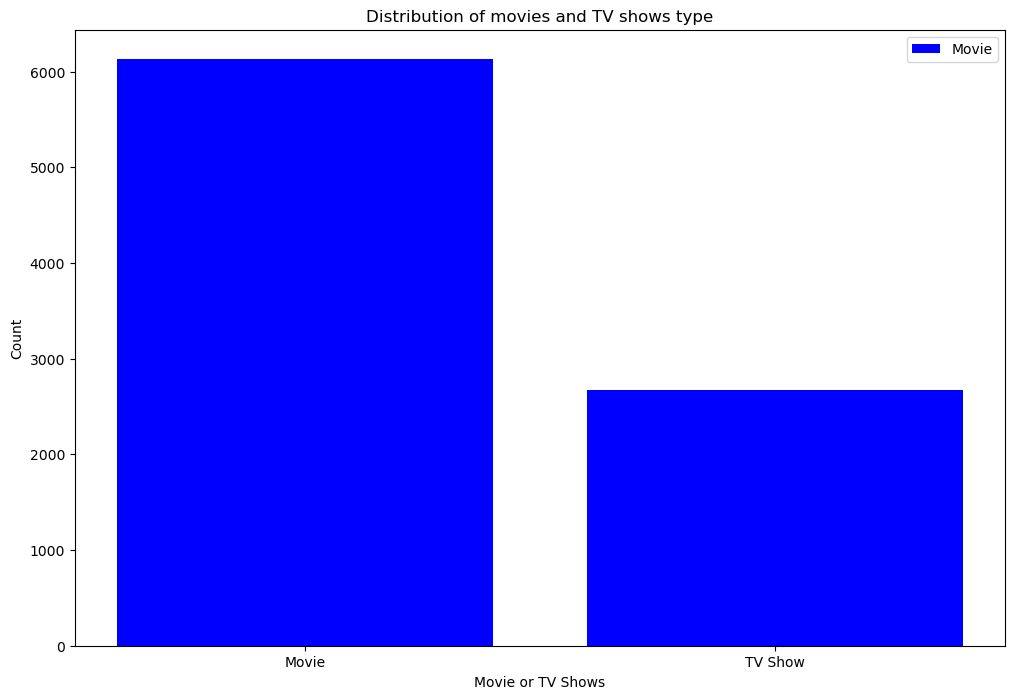

In [44]:
# fixing the figure size
plt.figure(figsize= (12, 8))

# creating bar plot 
plt.bar(Type, count, color = 'Blue')

plt.xlabel("Movie or TV Shows")
plt.ylabel("Count")
plt.legend(Type)
plt.title("Distribution of movies and TV shows type")
plt.show()

#### Generate a pie chart to display the percentage of movies and TV shows by country.

In [45]:
df['country'] = df['country'].astype(str).str.split(',').str[-1]

In [46]:
df.country = df.country.str.lstrip()

In [47]:
values = df['type'].value_counts()
colors = ['b', 'r', 'c', 'm', 'y']
lab = df['country'].unique()
values

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [48]:
from collections import Counter
country_data = df['country'].head(20)
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)

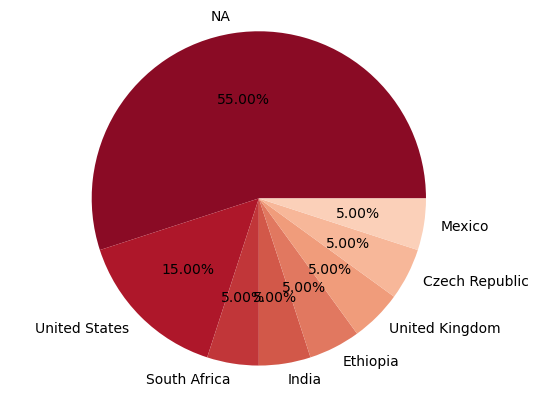

In [49]:
ax2 = plt.subplot()
ax2.pie(country_count, labels=country_count.index, shadow=False, startangle=0, colors=sns.color_palette("RdGy", n_colors=20),
       autopct='%1.2f%%')
ax2.axis('equal') 
plt.show()

#### Create a histogram to visualize the distribution of movie durations.

In [50]:
#df['duration'] = pd.DataFrame(df['duration'].where(df['duration'].str.contains('min')))

In [51]:
#Removing 'min'. 
df['duration'] = df['duration'].str.replace('min', ' ')

In [52]:
df['duration'] = df1.replace(np.nan, '0')

In [53]:
df['duration'] =  df['duration'].astype(int)

In [54]:
df['type'].unique()[0]

'Movie'

In [55]:
df['duration'].drop(labels = 0, axis = 0, inplace = True)

In [56]:
df['duration']

0        90
1         0
2         0
3         0
4         0
       ... 
8802    158
8803      0
8804     88
8805     88
8806    111
Name: duration, Length: 8807, dtype: int32

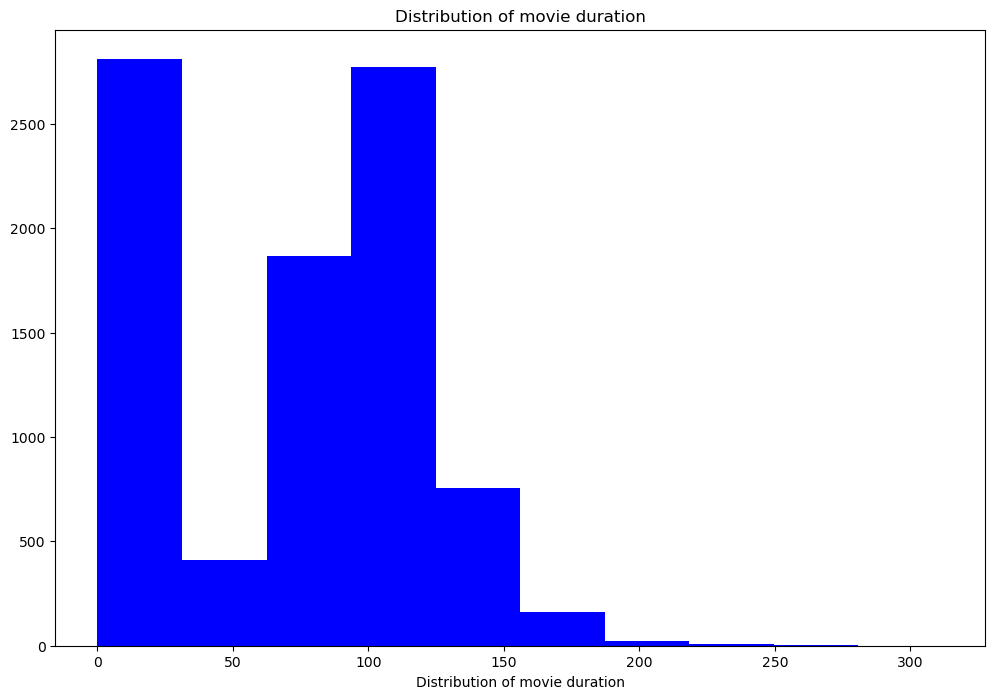

In [57]:
plt.figure(figsize= (12, 8))

plot_value = df['duration'].sort_values()
# creating histogram plot 
plt.hist(plot_value, color = 'Blue')

plt.xlabel("Distribution of movie duration")
plt.title("Distribution of movie duration")
plt.show()

#### Create a line plot to visualize the trend of the number of movies and TV shows added over the years.

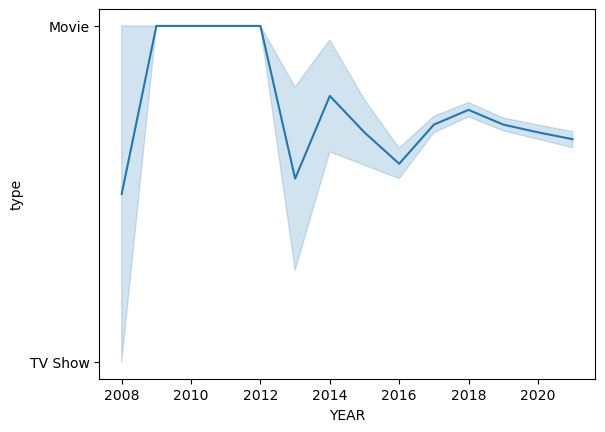

In [58]:
x = df["YEAR"]
y = df['type']
# creating trend line  
sns.lineplot(x = x, y = y, dashes= False,  linestyle='-')
plt.show()

#### Generate a stacked bar chart to compare the distribution of movies and TV shows across different genres.

In [59]:
df['listed_in'] = df['listed_in'].astype(str).str.split(',').str[-1]
df.listed_in = df.listed_in.str.lstrip()
x = df['listed_in'].unique().tolist()

In [60]:
genre = df['listed_in']
genre_count = pd.Series(dict(Counter(','.join(genre).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)

## Question 3: Data Summarization

In [61]:
df.describe()

,release_year,duration,YEAR
count,8807.000000,8807.000000,8797.000000
mean,2014.180198,69.286817,2018.871888
std,8.819312,51.534755,1.574243
min,1925.000000,0.000000,2008.000000
25%,2013.000000,0.000000,2018.000000
50%,2017.000000,88.000000,2019.000000
75%,2019.000000,106.000000,2020.000000
max,2021.000000,312.000000,2021.000000


#### • Calculate the total count of movies and TV shows in each rating category.

In [62]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
ffill          4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [63]:
df['rating'].value_counts().head(5)

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

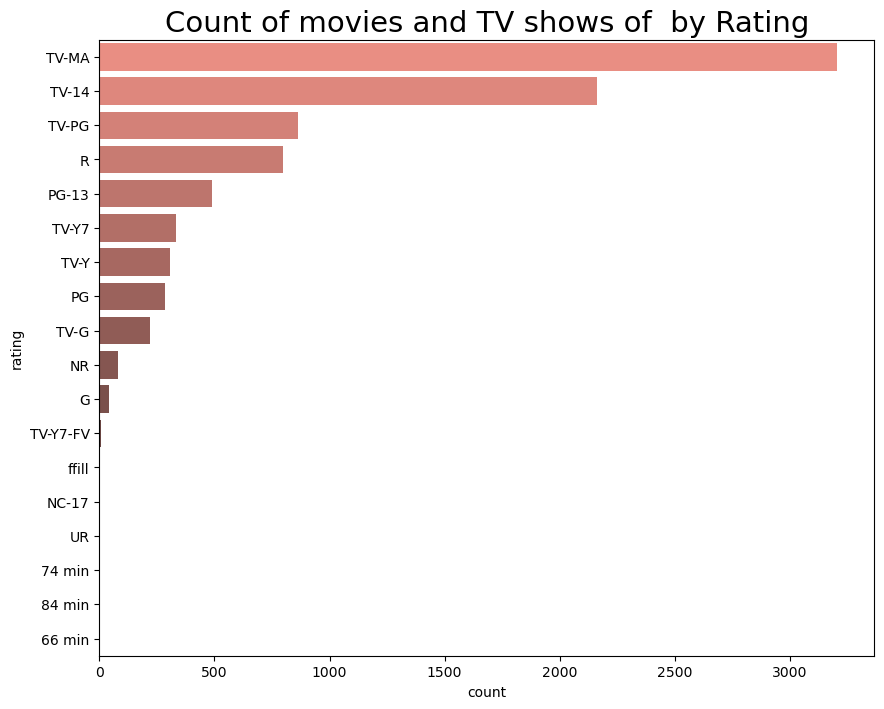

In [64]:
plt.figure(figsize=(10, 8))
sns.countplot(y=df['rating'], data=df['type'], order= df.rating.value_counts().index.to_list(), palette='dark:salmon_r')
plt.title('Count of movies and TV shows of  by Rating', fontsize=21);

#### • Determine the top 5 directors with the highest number of movies or TV shows.

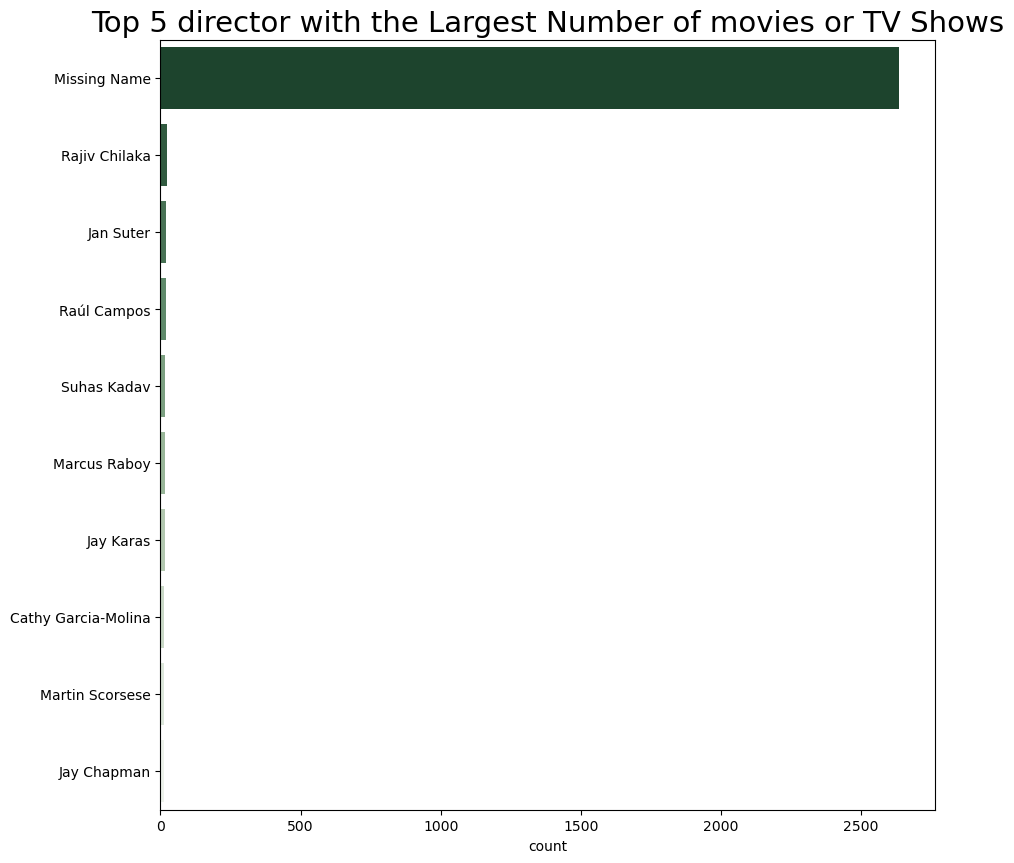

In [65]:
top_dir = df.set_index('type').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10, 10))
sns.countplot(y= top_dir , order=top_dir.value_counts().index.to_list()[:10], palette='Greens_r', saturation=.4)
plt.title('Top 5 director with the Largest Number of movies or TV Shows', fontsize=21);

#### • Find the country with the highest number of movies and TV shows.

In [66]:
df.loc[df['country'] == 'United States']['type'].value_counts().head(5)

Movie      2379
TV Show     833
Name: type, dtype: int64